In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
import numpy as np
import pandas as pd
import cv2
import os
import time
from keras.applications import vgg16
from keras.layers import Dense, Activation, Flatten
from keras.layers import merge, Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D,MaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.models import Sequential,load_model
from keras.utils import to_categorical
from tensorflow import keras
from keras.layers import InputLayer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [3]:
data_path = '/content/drive/My Drive/dataset/CK+48/'
data_dir_list = os.listdir(data_path)

img_data_list=[]

def read_data():
  for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    class_num=data_dir_list.index(dataset)
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        input_img=cv2.resize(input_img,(224,224))
        img_data_list.append([input_img,class_num])

read_data()

Loaded the images of dataset-disgust

Loaded the images of dataset-fear

Loaded the images of dataset-sadness

Loaded the images of dataset-happy

Loaded the images of dataset-anger

Loaded the images of dataset-surprise



In [4]:
image_data=[]
labels=[]
for features,label in img_data_list:
  image_data.append(features)
  labels.append(label)

img_data = np.array(image_data)
img_data = img_data.astype('float32')
img_data = img_data/255

labels=np.array(labels)
img_data.shape

(927, 224, 224, 3)

In [5]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [6]:
input_shape=(224,224,3)
vgg = vgg16.VGG16(include_top=True, weights='imagenet')

out = Dense(6, activation='softmax', name='predictions')(vgg.layers[-2].output)
vgg_model = Model(vgg.input, out)

for layer in vgg_model.layers:
    if layer.name in ['predictions','fc1','fc2']:
        layer.trainable = True
    else:
        layer.trainable = False

pd.set_option('max_colwidth', -1)
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

553467904/553467096 [==============================] - 40s 0us/step


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  del sys.path[0]


,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x7f3fcb849198>,input_1,False
1,<keras.layers.convolutional.Conv2D object at 0x7f3fcb8496d8>,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0x7f3fcb849940>,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0x7f3fcb849d68>,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0x7f3fcb849cf8>,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0x7f3fcb868d30>,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0x7f3fc03928d0>,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0x7f3fc0392710>,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0x7f3fc0396400>,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0x7f3fc0396dd8>,block3_conv3,False


In [7]:
vgg_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [8]:
skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(img_data, labels)

10

In [9]:
import matplotlib.pyplot as plt

def cnn_model(x_train,x_test,y_test,y_train):
    vgg = vgg16.VGG16(include_top=True, weights='imagenet')

    out = Dense(6, activation='softmax', name='predictions')(vgg.layers[-2].output)
    vgg_model = Model(vgg.input, out)

    for layer in vgg_model.layers:
      if layer.name in ['predictions','fc1','fc2']:
          layer.trainable = True
      else:
          layer.trainable = False
    model = Sequential()
    model.add(vgg_model)
    model.compile(Adam(lr=.001), loss='categorical_crossentropy', metrics=['accuracy']) 


    history=model.fit(x_train, y_train, epochs=15, batch_size=30,verbose=1)

    loss,acc = model.evaluate(x_test, y_test)
    y_prediction = model.predict_classes(x_test)
    y_test_original=np.argmax(y_test,axis=1)
    confusion=confusion_matrix(y_true=y_test_original, y_pred=y_prediction)
    print(history.history.keys())
    plt.plot(history.history['loss'])
    plt.title('model history')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['loss'], loc='upper left')
    plt.show()
    plt.plot(history.history['accuracy'])
    plt.title('model history')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['accuracy'], loc='upper left')
    plt.show()
    return acc,confusion

In [10]:
prediction=[]
confusion_list=[]
num_classes = 6
for train_index, test_index in skf.split(img_data, labels):
    print("TRAIN:", train_index)
    print("TEST:", test_index)
    x_train, x_test = img_data[train_index], img_data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    x_train=x_train.reshape(x_train.shape[0],img_data.shape[1],img_data.shape[2],img_data.shape[3])
    x_test=x_test.reshape(x_test.shape[0],img_data.shape[1],img_data.shape[2],img_data.shape[3])
    print(x_train.shape)
    print(x_test.shape)
    y_train =to_categorical(y_train, num_classes)
    y_test =to_categorical(y_test, num_classes)
    print(y_train.shape)
    print(y_test.shape)
    print("---------------------------------------------------------------------------")

TRAIN: [ 18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 185 186 187
 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205
 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223
 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241
 242 243 244 245 246 247 248 249 250 251 260 261 262 263 264 265 266 267
 268 269 270 271 272 273 274 275 276 277 278

Epoch 1/15
834/834 [==============================] - 17s 20ms/step - loss: 5.3674 - accuracy: 0.2986
Epoch 2/15
834/834 [==============================] - 6s 7ms/step - loss: 0.6944 - accuracy: 0.7158
Epoch 3/15
834/834 [==============================] - 6s 7ms/step - loss: 0.2727 - accuracy: 0.9005
Epoch 4/15
834/834 [==============================] - 6s 7ms/step - loss: 0.1077 - accuracy: 0.9580
Epoch 5/15
834/834 [==============================] - 6s 7ms/step - loss: 0.1237 - accuracy: 0.9604
Epoch 6/15
834/834 [==============================] - 6s 7ms/step - loss: 0.1114 - accuracy: 0.9604
Epoch 7/15
834/834 [==============================] - 6s 7ms/step - loss: 0.0260 - accuracy: 0.9904
Epoch 8/15
834/834 [==============================] - 6s 7ms/step - loss: 0.0215 - accuracy: 0.9904
Epoch 9/15
834/834 [==============================] - 6s 7ms/step - loss: 0.0052 - accuracy: 0.9988
Epoch 10/15
834/834 [==============================] - 6s 7ms/step - loss: 5.5437e-04 - accuracy: 

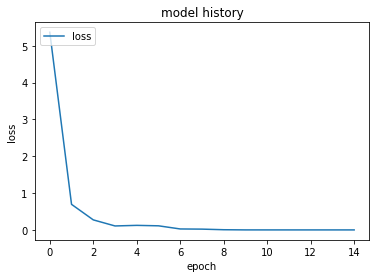

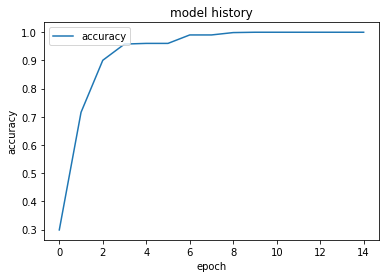

1.0
[[18  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0  8  0  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0  0 13  0]
 [ 0  0  0  0  0 25]]
---------------------------------------------------------------------------
Epoch 1/15
834/834 [==============================] - 6s 8ms/step - loss: 7.4224 - accuracy: 0.3993
Epoch 2/15
834/834 [==============================] - 6s 7ms/step - loss: 0.6247 - accuracy: 0.7578
Epoch 3/15
834/834 [==============================] - 6s 7ms/step - loss: 0.2443 - accuracy: 0.9065
Epoch 4/15
834/834 [==============================] - 6s 7ms/step - loss: 0.0826 - accuracy: 0.9712
Epoch 5/15
834/834 [==============================] - 6s 7ms/step - loss: 0.0225 - accuracy: 0.9940
Epoch 6/15
834/834 [==============================] - 6s 7ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 7/15
834/834 [==============================] - 6s 7ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 8/15
834/834 [==============================] - 6s 7ms/step - loss: 4.5434e-04 - accura

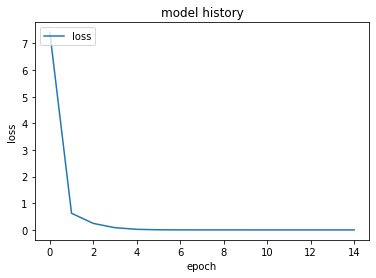

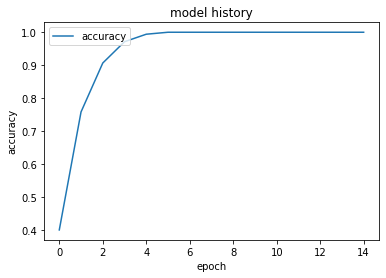

1.0
[[18  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0  8  0  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0  0 13  0]
 [ 0  0  0  0  0 25]]
---------------------------------------------------------------------------
Epoch 1/15
834/834 [==============================] - 6s 8ms/step - loss: 6.9265 - accuracy: 0.3285
Epoch 2/15
834/834 [==============================] - 6s 7ms/step - loss: 0.7726 - accuracy: 0.6871
Epoch 3/15
834/834 [==============================] - 6s 7ms/step - loss: 0.2807 - accuracy: 0.8801
Epoch 4/15
834/834 [==============================] - 6s 7ms/step - loss: 0.0867 - accuracy: 0.9736
Epoch 5/15
834/834 [==============================] - 6s 7ms/step - loss: 0.0957 - accuracy: 0.9592
Epoch 6/15
834/834 [==============================] - 6s 7ms/step - loss: 0.0503 - accuracy: 0.9856
Epoch 7/15
834/834 [==============================] - 6s 7ms/step - loss: 0.1330 - accuracy: 0.9568
Epoch 8/15
834/834 [==============================] - 6s 7ms/step - loss: 0.0249 - accuracy: 

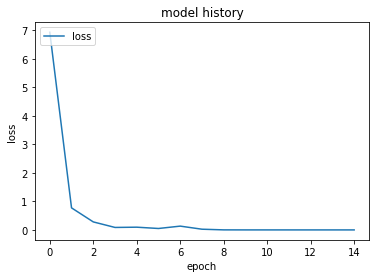

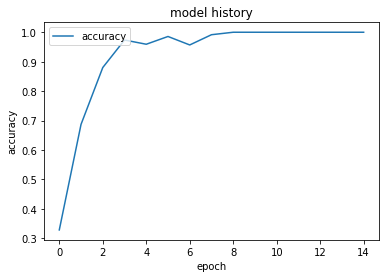

1.0
[[18  0  0  0  0  0]
 [ 0  7  0  0  0  0]
 [ 0  0  9  0  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0  0 13  0]
 [ 0  0  0  0  0 25]]
---------------------------------------------------------------------------
Epoch 1/15
834/834 [==============================] - 6s 8ms/step - loss: 6.0104 - accuracy: 0.3945
Epoch 2/15
834/834 [==============================] - 6s 7ms/step - loss: 0.7327 - accuracy: 0.7002
Epoch 3/15
834/834 [==============================] - 6s 7ms/step - loss: 0.2402 - accuracy: 0.9101
Epoch 4/15
834/834 [==============================] - 6s 7ms/step - loss: 0.1128 - accuracy: 0.9640
Epoch 5/15
834/834 [==============================] - 6s 7ms/step - loss: 0.0465 - accuracy: 0.9832
Epoch 6/15
834/834 [==============================] - 6s 7ms/step - loss: 0.0405 - accuracy: 0.9856
Epoch 7/15
834/834 [==============================] - 6s 7ms/step - loss: 0.2331 - accuracy: 0.9424
Epoch 8/15
834/834 [==============================] - 6s 7ms/step - loss: 0.1018 - accuracy: 

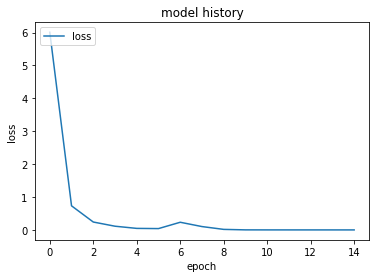

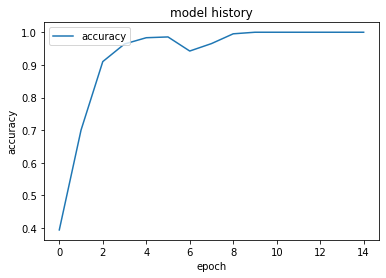

1.0
[[18  0  0  0  0  0]
 [ 0  7  0  0  0  0]
 [ 0  0  9  0  0  0]
 [ 0  0  0 20  0  0]
 [ 0  0  0  0 14  0]
 [ 0  0  0  0  0 25]]
---------------------------------------------------------------------------
Epoch 1/15
834/834 [==============================] - 6s 8ms/step - loss: 5.4424 - accuracy: 0.3969
Epoch 2/15
834/834 [==============================] - 6s 7ms/step - loss: 0.6694 - accuracy: 0.7470
Epoch 3/15
834/834 [==============================] - 6s 7ms/step - loss: 0.1809 - accuracy: 0.9388
Epoch 4/15
834/834 [==============================] - 6s 7ms/step - loss: 0.0612 - accuracy: 0.9808
Epoch 5/15
834/834 [==============================] - 6s 7ms/step - loss: 0.0507 - accuracy: 0.9808
Epoch 6/15
834/834 [==============================] - 6s 7ms/step - loss: 0.0567 - accuracy: 0.9784
Epoch 7/15
834/834 [==============================] - 6s 7ms/step - loss: 0.1236 - accuracy: 0.9508
Epoch 8/15
834/834 [==============================] - 6s 7ms/step - loss: 0.0364 - accuracy: 

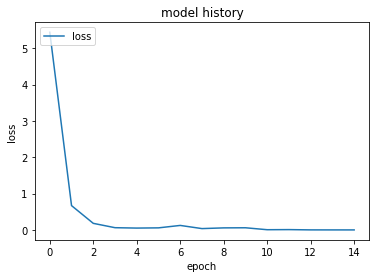

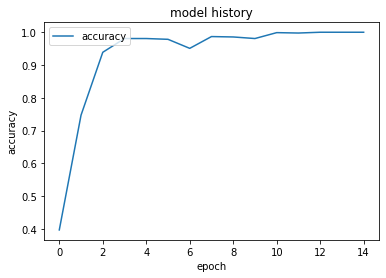

1.0
[[18  0  0  0  0  0]
 [ 0  7  0  0  0  0]
 [ 0  0  9  0  0  0]
 [ 0  0  0 20  0  0]
 [ 0  0  0  0 14  0]
 [ 0  0  0  0  0 25]]
---------------------------------------------------------------------------
Epoch 1/15
834/834 [==============================] - 6s 7ms/step - loss: 6.3929 - accuracy: 0.4269
Epoch 2/15
834/834 [==============================] - 6s 7ms/step - loss: 0.6845 - accuracy: 0.7266
Epoch 3/15
834/834 [==============================] - 6s 7ms/step - loss: 0.3076 - accuracy: 0.8729
Epoch 4/15
834/834 [==============================] - 6s 7ms/step - loss: 0.0811 - accuracy: 0.9772
Epoch 5/15
834/834 [==============================] - 6s 7ms/step - loss: 0.0498 - accuracy: 0.9856
Epoch 6/15
834/834 [==============================] - 6s 7ms/step - loss: 0.0402 - accuracy: 0.9904
Epoch 7/15
834/834 [==============================] - 6s 7ms/step - loss: 0.0691 - accuracy: 0.9724
Epoch 8/15
834/834 [==============================] - 6s 7ms/step - loss: 0.0352 - accuracy: 

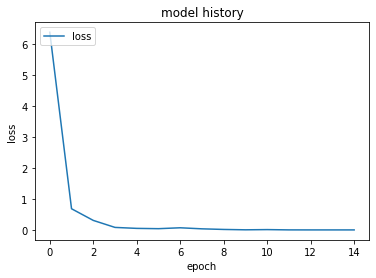

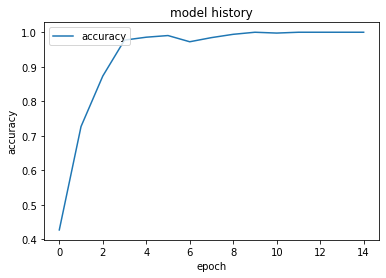

1.0
[[18  0  0  0  0  0]
 [ 0  7  0  0  0  0]
 [ 0  0  9  0  0  0]
 [ 0  0  0 20  0  0]
 [ 0  0  0  0 14  0]
 [ 0  0  0  0  0 25]]
---------------------------------------------------------------------------
Epoch 1/15
834/834 [==============================] - 6s 7ms/step - loss: 5.9698 - accuracy: 0.3885
Epoch 2/15
834/834 [==============================] - 6s 7ms/step - loss: 0.6518 - accuracy: 0.7374
Epoch 3/15
834/834 [==============================] - 6s 7ms/step - loss: 0.2910 - accuracy: 0.8837
Epoch 4/15
834/834 [==============================] - 6s 7ms/step - loss: 0.1141 - accuracy: 0.9544
Epoch 5/15
834/834 [==============================] - 6s 7ms/step - loss: 0.0130 - accuracy: 0.9964
Epoch 6/15
834/834 [==============================] - 6s 7ms/step - loss: 0.0376 - accuracy: 0.9856
Epoch 7/15
834/834 [==============================] - 6s 7ms/step - loss: 0.1425 - accuracy: 0.9496
Epoch 8/15
834/834 [==============================] - 6s 7ms/step - loss: 0.0166 - accuracy: 

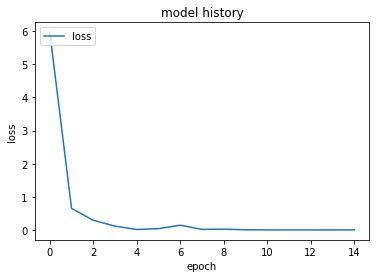

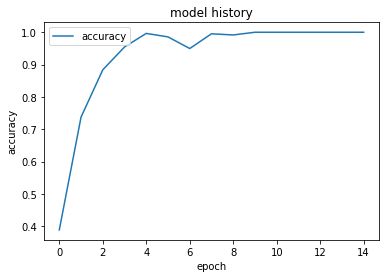

1.0
[[18  0  0  0  0  0]
 [ 0  7  0  0  0  0]
 [ 0  0  8  0  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0  0 14  0]
 [ 0  0  0  0  0 25]]
---------------------------------------------------------------------------
Epoch 1/15
835/835 [==============================] - 9s 10ms/step - loss: 6.0657 - accuracy: 0.3749
Epoch 2/15
835/835 [==============================] - 6s 7ms/step - loss: 0.5591 - accuracy: 0.7916
Epoch 3/15
835/835 [==============================] - 6s 7ms/step - loss: 0.2175 - accuracy: 0.9114
Epoch 4/15
835/835 [==============================] - 6s 7ms/step - loss: 0.0837 - accuracy: 0.9760
Epoch 5/15
835/835 [==============================] - 6s 7ms/step - loss: 0.0122 - accuracy: 1.0000
Epoch 6/15
835/835 [==============================] - 6s 7ms/step - loss: 0.0968 - accuracy: 0.9617
Epoch 7/15
835/835 [==============================] - 6s 7ms/step - loss: 0.0432 - accuracy: 0.9880
Epoch 8/15
835/835 [==============================] - 6s 7ms/step - loss: 0.0032 - accuracy:

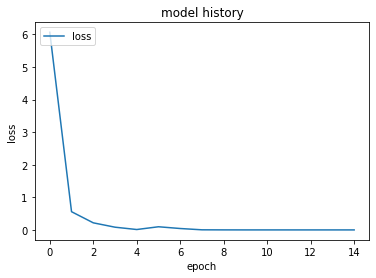

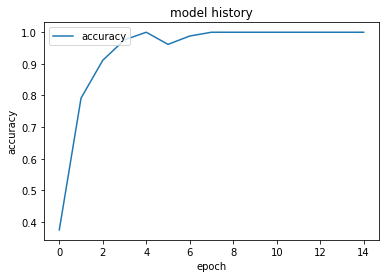

1.0
[[17  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0  8  0  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0  0 14  0]
 [ 0  0  0  0  0 24]]
---------------------------------------------------------------------------
Epoch 1/15
835/835 [==============================] - 6s 7ms/step - loss: 7.0348 - accuracy: 0.3749
Epoch 2/15
835/835 [==============================] - 6s 7ms/step - loss: 0.7093 - accuracy: 0.7365
Epoch 3/15
835/835 [==============================] - 6s 7ms/step - loss: 0.3014 - accuracy: 0.8790
Epoch 4/15
835/835 [==============================] - 6s 7ms/step - loss: 0.1000 - accuracy: 0.9677
Epoch 5/15
835/835 [==============================] - 6s 7ms/step - loss: 0.0353 - accuracy: 0.9868
Epoch 6/15
835/835 [==============================] - 6s 7ms/step - loss: 0.1016 - accuracy: 0.9605
Epoch 7/15
835/835 [==============================] - 6s 7ms/step - loss: 0.0541 - accuracy: 0.9808
Epoch 8/15
835/835 [==============================] - 6s 7ms/step - loss: 0.0166 - accuracy: 

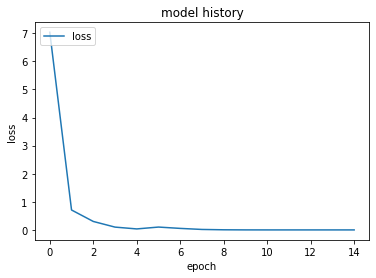

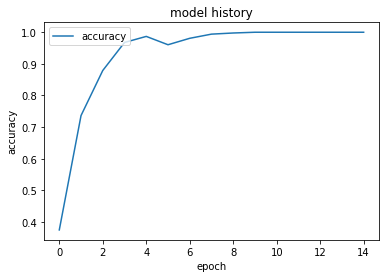

1.0
[[17  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0  8  0  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0  0 13  0]
 [ 0  0  0  0  0 25]]
---------------------------------------------------------------------------
Epoch 1/15
835/835 [==============================] - 6s 8ms/step - loss: 6.6547 - accuracy: 0.4024
Epoch 2/15
835/835 [==============================] - 6s 7ms/step - loss: 0.6105 - accuracy: 0.7593
Epoch 3/15
835/835 [==============================] - 6s 7ms/step - loss: 0.1968 - accuracy: 0.9269
Epoch 4/15
835/835 [==============================] - 6s 7ms/step - loss: 0.1785 - accuracy: 0.9317
Epoch 5/15
835/835 [==============================] - 6s 7ms/step - loss: 0.0934 - accuracy: 0.9677
Epoch 6/15
835/835 [==============================] - 6s 7ms/step - loss: 0.0168 - accuracy: 0.9964
Epoch 7/15
835/835 [==============================] - 6s 7ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 8/15
835/835 [==============================] - 6s 7ms/step - loss: 0.0019 - accuracy: 

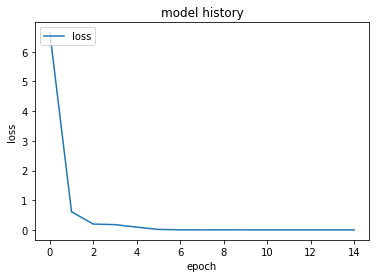

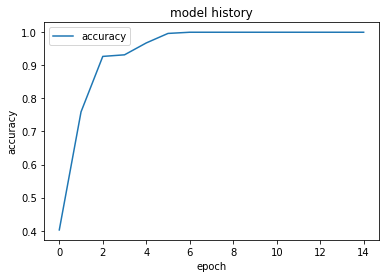

1.0
[[17  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0  8  0  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0  0 13  0]
 [ 0  0  0  0  0 25]]
---------------------------------------------------------------------------


In [11]:
for train_index, test_index in skf.split(img_data, labels):
    # print("TRAIN:", train_index)
    # print("TEST:", test_index)
    x_train, x_test = img_data[train_index], img_data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    x_train=x_train.reshape(x_train.shape[0],img_data.shape[1],img_data.shape[2],img_data.shape[3])
    x_test=x_test.reshape(x_test.shape[0],img_data.shape[1],img_data.shape[2],img_data.shape[3])
    # print(x_train.shape)
    # print(x_test.shape)
    y_train =to_categorical(y_train, num_classes)
    y_test =to_categorical(y_test, num_classes)
    # print(y_train.shape)
    # print(y_test.shape)
    X,Y=cnn_model(x_train,x_test,y_test,y_train)
    prediction.append(X)
    confusion_list.append(Y)
    print(X)
    print(Y)
    print("---------------------------------------------------------------------------")

In [12]:
print(prediction)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [13]:
for x in range(len(confusion_list)): 
    print (confusion_list[x],sep = "\n")
    print("----------------------------") 

[[18  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0  8  0  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0  0 13  0]
 [ 0  0  0  0  0 25]]
----------------------------
[[18  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0  8  0  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0  0 13  0]
 [ 0  0  0  0  0 25]]
----------------------------
[[18  0  0  0  0  0]
 [ 0  7  0  0  0  0]
 [ 0  0  9  0  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0  0 13  0]
 [ 0  0  0  0  0 25]]
----------------------------
[[18  0  0  0  0  0]
 [ 0  7  0  0  0  0]
 [ 0  0  9  0  0  0]
 [ 0  0  0 20  0  0]
 [ 0  0  0  0 14  0]
 [ 0  0  0  0  0 25]]
----------------------------
[[18  0  0  0  0  0]
 [ 0  7  0  0  0  0]
 [ 0  0  9  0  0  0]
 [ 0  0  0 20  0  0]
 [ 0  0  0  0 14  0]
 [ 0  0  0  0  0 25]]
----------------------------
[[18  0  0  0  0  0]
 [ 0  7  0  0  0  0]
 [ 0  0  9  0  0  0]
 [ 0  0  0 20  0  0]
 [ 0  0  0  0 14  0]
 [ 0  0  0  0  0 25]]
----------------------------
[[18  0  0  0  0  0]
 [ 0  7  0  0  0  0]
 [ 0  0  8  0  0  0]
 